In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('productanalyst_assignmentdata.csv')

In [3]:
df.dtypes

shop_date       object
lodging_name    object
market          object
num_guests       int64
check_in        object
check_out       object
advance          int64
los              int64
hopper_price    object
competitor_1    object
competitor_2    object
competitor_3    object
competitor_4    object
dtype: object

In [4]:
df.head(5)

,shop_date,lodging_name,market,num_guests,check_in,check_out,advance,los,hopper_price,competitor_1,competitor_2,competitor_3,competitor_4
0,12/19/2022,Hotel 19,Atlanta,2,12/19,12/20,0,1,73,118,101,118,118
1,12/19/2022,Hotel 19,Atlanta,2,12/22,12/23,3,1,85,120,113,120,132
2,12/19/2022,Hotel 19,Atlanta,2,12/19,12/23,0,4,418,477,439,477,515
3,12/19/2022,Hotel 19,Atlanta,2,12/22,12/26,3,4,466,531,501,531,588
4,12/19/2022,Hotel 19,Atlanta,2,12/19,12/25,0,6,618,717,665,717,780


In [5]:
df = df.replace({'Sold Out': 0, 'Sold out': 0})
df['hopper_price'] = df['hopper_price'].astype(int)
df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']] = \
df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].astype(int)
df['lowest_competitor_price'] = df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].min(axis=1)
df['highest_competitor_price'] = df[['competitor_1','competitor_2', 'competitor_3', 'competitor_4']].max(axis=1)
df['competitive_margin'] =  df['lowest_competitor_price'] - df['hopper_price']

In [6]:
df.head(5)

,shop_date,lodging_name,market,num_guests,check_in,check_out,advance,los,hopper_price,competitor_1,competitor_2,competitor_3,competitor_4,lowest_competitor_price,highest_competitor_price,competitive_margin
0,12/19/2022,Hotel 19,Atlanta,2,12/19,12/20,0,1,73,118,101,118,118,101,118,28
1,12/19/2022,Hotel 19,Atlanta,2,12/22,12/23,3,1,85,120,113,120,132,113,132,28
2,12/19/2022,Hotel 19,Atlanta,2,12/19,12/23,0,4,418,477,439,477,515,439,515,21
3,12/19/2022,Hotel 19,Atlanta,2,12/22,12/26,3,4,466,531,501,531,588,501,588,35
4,12/19/2022,Hotel 19,Atlanta,2,12/19,12/25,0,6,618,717,665,717,780,665,780,47


In [7]:
df['market'].unique()

array(['Atlanta', 'Austin', 'Boston', 'Cancun', 'Charlotte', 'Chicago',
       'Dallas', 'Denver', 'Fort Lauderdale', 'Honolulu', 'Houston',
       'Las Vegas', 'Los Angeles', 'Miami', 'Nashville', 'New Orleans',
       'New York', 'Orlando', 'Phoenix', 'Portland', 'San Francisco',
       'Seattle', 'Tampa', 'Temecula', 'Washington'], dtype=object)

In [8]:
len(df['market'].unique())

25

In [9]:
df['advance'].unique()

array([0, 3], dtype=int64)

In [10]:
df['los'].unique()

array([1, 4, 6], dtype=int64)

ValueError: Illegal argument(s) to subplot: (1, 2)

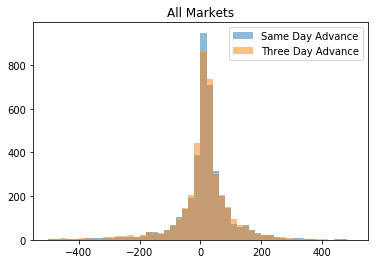

In [43]:
same_day_advance = df[df['advance']==0]
three_day_advance = df[df['advance']==3]
fig, ax = plt.subplots(ncols=2, figsize=(10,4))
plt.hist(same_day_advance['competitive_margin'], bins=50, range=(-500,500), alpha=0.5, label='Same Day Advance')
plt.hist(three_day_advance['competitive_margin'], bins=50, range=(-500,500), alpha=0.5, label='Three Day Advance')
plt.legend(loc='upper right')
plt.title('All Markets')
plt.subplot(1, 2)
plt.show()

In [24]:
market_count = df.groupby(['market'])[['competitive_margin']].count().reset_index()
df.competitive_margin.describe()

count    8080.000000
mean      -37.114233
std       339.813367
min     -7877.000000
25%       -16.000000
50%        13.000000
75%        42.000000
max      2103.000000
Name: competitive_margin, dtype: float64

In [30]:
proposed_outliers = df.loc[(df['competitive_margin']<-1000) | (df['competitive_margin']>1000)]
proposed_outliers.groupby(['market'])[['competitive_margin']].count()

,competitive_margin
market,
Atlanta,9
Austin,13
Cancun,14
Dallas,11
Fort Lauderdale,9
Honolulu,29
Houston,8
Las Vegas,16
Los Angeles,6


In [35]:
df['competitive_margin'].describe()

count    8080.000000
mean      -37.114233
std       339.813367
min     -7877.000000
25%       -16.000000
50%        13.000000
75%        42.000000
max      2103.000000
Name: competitive_margin, dtype: float64